Imports

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, KFold

Add Google Shared Drive

In [2]:
#Written in Google Collab: add drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Load Data and Labels Arrays

In [0]:
#Load in the data...
data_tensor = np.load('/content/drive/Shared drives/DSCI400_Revamp/eq_data_tensor_1D.npy')
label_array = np.load('/content/drive/Shared drives/DSCI400_Revamp/eq_label_array_1D.npy')

time_len = data_tensor.shape[1]

Make Test/Train Split

In [0]:
#Separate into test/train
X_train, X_test, y_train, y_test = train_test_split(data_tensor, label_array, test_size=0.33)


Make CNN Model

In [0]:
def compileModelTime():
  """
  Creates a Keras CNN model for time series input.
  """
  model2 = tf.keras.Sequential()

  #Add layers
  model2.add(tf.keras.layers.Convolution1D(64, kernel_size=16, activation='tanh', input_shape=(time_len,1)))
  model2.add(tf.keras.layers.Convolution1D(128, kernel_size=8, activation='tanh'))
  model2.add(tf.keras.layers.Convolution1D(256, kernel_size=5, activation='tanh'))
  model2.add(tf.keras.layers.Convolution1D(128, kernel_size=3, activation='tanh'))
  model2.add(tf.keras.layers.GlobalMaxPooling1D())
  model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model2

Make Model, Train, and Plot Accuracy/Loss Curves

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 6065, 64)          1088      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 6058, 128)         65664     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6054, 256)         164096    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6052, 128)         98432     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 329,409
Trainable params: 329,409
Non-trainable params: 0
________________________________________________

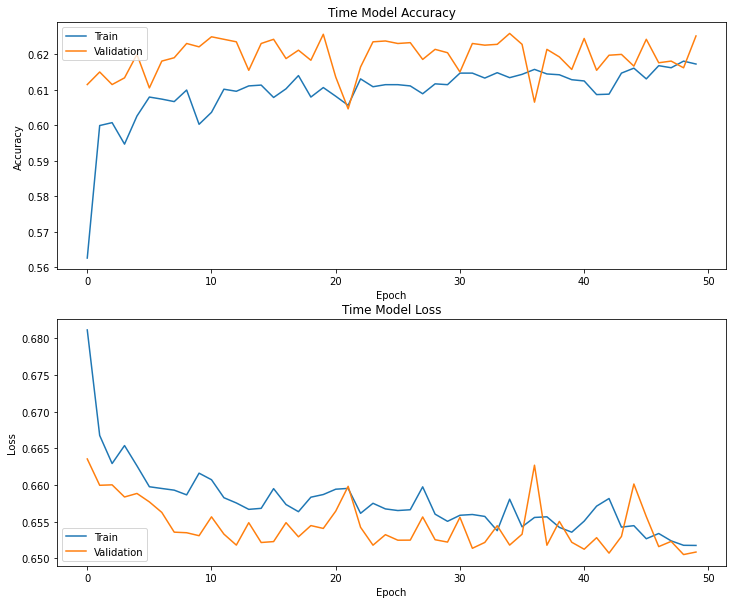

In [8]:
## Generates a time input CNN and creates train vs validation graphs for loss 
## and accuracy over 50 epochs

#Make Model
model2 = compileModelTime()
model2.summary()

#Train Model
history = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data = (X_test, y_test), verbose=1)
test_loss2, test_acc2 = model2.evaluate(X_test,y_test)

# Plot training & validation accuracy values
plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Time Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Time Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')

#Save figure and plot
plt.savefig('/content/drive/Shared drives/DSCI400_Revamp/TrainvsValidateTIME')
plt.show()

#Destroy the old model to prevent overloading GPU
tf.keras.backend.clear_session()

Plot ROC curve

In [0]:
## Trains a model using the epochs determined from the two cells above and 
## generates an ROC curve

# Model training
model_auc = compileModelTime()
model_auc.fit(X_train, y_train, epochs=15, batch_size=32, validation_data = (X_test, y_test), verbose=1)

# ROC creation
y_pred_auc = model_auc.predict(X_test).ravel()

fpr_auc, tpr_auc, threshold_auc = roc_curve(y_test, y_pred_auc)
auc_forimg = auc(fpr_auc, tpr_auc)

plt.plot(fpr_auc, tpr_auc, label = 'Model AUC = {:.3f}'.format(auc_forimg))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('/content/drive/Shared drives/DSCI400_Revamp/CNN_ROC')
plt.show()

Epoch 1/15
268/268 [==============================] - 21s 79ms/step - loss: 0.6804 - accuracy: 0.5560 - val_loss: 0.6871 - val_accuracy: 0.4993
Epoch 2/15
268/268 [==============================] - 21s 79ms/step - loss: 0.6688 - accuracy: 0.5884 - val_loss: 0.6580 - val_accuracy: 0.6257
Epoch 3/15
268/268 [==============================] - 21s 79ms/step - loss: 0.6629 - accuracy: 0.6026 - val_loss: 0.6581 - val_accuracy: 0.6203
Epoch 4/15
268/268 [==============================] - 21s 79ms/step - loss: 0.6647 - accuracy: 0.5970 - val_loss: 0.6588 - val_accuracy: 0.6174
Epoch 5/15
268/268 [==============================] - 21s 79ms/step - loss: 0.6630 - accuracy: 0.6024 - val_loss: 0.6577 - val_accuracy: 0.6200
Epoch 6/15
268/268 [==============================] - 21s 79ms/step - loss: 0.6625 - accuracy: 0.6014 - val_loss: 0.6575 - val_accuracy: 0.6200
Epoch 7/15
268/268 [==============================] - 21s 79ms/step - loss: 0.6632 - accuracy: 0.6053 - val_loss: 0.6592 - val_accuracy:

Plot 10-Fold Cross Validation Curve

In [0]:
## Perform 10-fold cross validation and generates ROC curves with average AUC
## and generates fold accuracy distribution with average accuracy

fold_accuracies = []
auc_list = []
n_split=10
i = 0;
 
#For each fold, generate a model and test it
for train_index,test_index in KFold(n_split,shuffle=True).split(data_tensor):
  x_foldtrain, x_foldtest = data_tensor[train_index], data_tensor[test_index]
  y_foldtrain, y_foldtest = label_array[train_index], label_array[test_index]

  i += 1

  model = compileModelTime()

  history = model.fit(x_foldtrain, y_foldtrain, epochs=15, batch_size=32, verbose=0)
  test_loss, test_acc = model.evaluate(x_foldtest, y_foldtest)
  fold_accuracies.append(test_acc)
  
  y_pred = model.predict(x_foldtest).ravel()
  fpr, tpr, threshold = roc_curve(y_foldtest, y_pred)
  auc1 = auc(fpr, tpr)
  auc_list.append(auc1)
  plt.plot(fpr, tpr, label = 'Fold {} AUC = {:.3f}'.format(i, auc1))

  tf.keras.backend.clear_session()
  
  print("The Number of 1's is: {:d}".format(sum(y_pred > 0.5)))
  print("The Number of 0's is: {:d}".format(sum(y_pred <= 0.5)))
  print('-------------------------------------------')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curves (Avg. AUC = {:.3f})'.format(np.average(auc_list)))
plt.legend(loc='best')
plt.show()

plt.hist(np.array(fold_accuracies) * 100)
plt.title('N-fold Cross Validation: {:.3f}% Avg. Accuracy'.format(np.average(fold_accuracies) * 100))
plt.xlabel('Accuracy (%)')
plt.ylabel('Number of Folds')
plt.show()